# Analysis of weather data:

1. The highest temperatures on 3/14/2018 were experienced near the Tropics of Capricorn at latitude (-23.5°) and not near the equator. Howerever, the temperatures at or near the equator were also high and consistent with our hypothesis.

2. No correlation was found between latitude and cloud cover or wind speed. Frequency of wind speed, however, can be observed. The most common observation was speeds between 0 and 15 mph. Wind speed seems to remain mostly below 30 mph.

3. There doesn't seem to be a correlation between humidity % and latitude. The data points are fairly scattered.


In [1]:
import requests as req
import json
from citipy import citipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import csv

In [2]:
weather_df = pd.DataFrame()
weather_df['Latitude'] = [np.random.uniform(-90,90) for x in range(1500)]
weather_df['Longitude'] = [np.random.uniform(-180, 180) for x in range(1500)]

weather_df.head()

,Latitude,Longitude
0,23.319659,66.924238
1,-86.440005,103.192761
2,-26.524224,48.583067
3,33.476057,169.717345
4,-1.338421,-87.840204


In [3]:
#Create columns for city, country,temperature,humidity,cloudiness,wind speed

weather_df['City'] = ""
weather_df['Country'] = ""
weather_df['Temperature (F)'] = ""
weather_df['Humidity (%)'] = ""
weather_df['Cloudiness (%)'] = ""
weather_df['Wind Speed (mph)'] = ""
 
#Use citipy library to get the closest city and country name to the random coordinate

for index, row in weather_df.iterrows():
    near_city = citipy.nearest_city(row['Latitude'], row['Longitude']).city_name
    near_country = citipy.nearest_city(row['Latitude'], row['Longitude']).country_code
    
    weather_df.set_value(index,"City", near_city)
    weather_df.set_value(index,"Country", near_country)
    
    
weather_df.head()

,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,23.319659,66.924238,keti bandar,pk,,,,
1,-86.440005,103.192761,albany,au,,,,
2,-26.524224,48.583067,taolanaro,mg,,,,
3,33.476057,169.717345,severo-kurilsk,ru,,,,
4,-1.338421,-87.840204,san cristobal,ec,,,,


In [4]:
#Remove duplicate cities and countries and NA values

weather_df = weather_df.drop_duplicates(['City','Country'],keep = "first")
weather_df = weather_df.dropna()

#Get the sample size
len(weather_df['City'].value_counts())

623

In [ ]:
api_key = "9e046c1f8098cee75dad264a4c38cc30"
url = "http://api.openweathermap.org/data/2.5/weather?" 
units = "imperial"
counter = 1

for index, row in weather_df.iterrows():
    try:
        latitude_check = row["Latitude"]
        longitude_check = row["Longitude"]
        city = citipy.nearest_city(latitude_check, longitude_check)
        cityname = city.city_name
        country_name = city.country_code
        
        query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + cityname + "," + country_name
    
        print("Retrieving data for city #" + str(counter) + " for " + cityname + "," + country_name)
        print("URL: " + query_url)
        print("-----------------------------------------------------------------------------")
    
        response = req.get(query_url).json()
        
        temp = response["main"]["temp_max"]
        humid = response["main"]["humidity"]
        cloudy = response["clouds"]["all"]
        wind = response["wind"]["speed"]
         
        newlatitude = response["coord"]["lat"]
        newlongtitude = response["coord"]["lon"]
    
        weather_df.set_value(index, "City", cityname)
        weather_df.set_value(index, "Country", country_name)
        weather_df.set_value(index, "Temperature (F)", temp)
        weather_df.set_value(index, "Humidity (%)", humid)
        weather_df.set_value(index, "Cloudiness (%)", cloudy)
        weather_df.set_value(index, "Wind Speed (mph)", wind)
         
        weather_df.set_value(index, "Latitude", newlatitude)
        weather_df.set_value(index, "Longitude", newlongitude)
    except:
        print("Getting an error, skipping this one!")
    
    counter = counter + 1
    
    time.sleep(2)

print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

Retrieving data for city #1 for rikitea,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=rikitea,pf
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #2 for hermanus,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=hermanus,za
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #3 for mataura,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=mataura,pf
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #4 for fairbanks,us
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=fairbanks,us
-

Getting an error, skipping this one!
Retrieving data for city #31 for saint george,bm
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=saint george,bm
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #32 for victoria,sc
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=victoria,sc
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #33 for castro,cl
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=castro,cl
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #34 for hobart,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75d

Getting an error, skipping this one!
Retrieving data for city #61 for dagana,sn
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=dagana,sn
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #62 for kaitangata,nz
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=kaitangata,nz
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #63 for cuite,br
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=cuite,br
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #64 for port alfred,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264

Retrieving data for city #90 for albany,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=albany,au
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #91 for gejiu,cn
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=gejiu,cn
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #92 for yellowknife,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=yellowknife,ca
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #93 for cayenne,gf
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=cayenne,gf
-

Getting an error, skipping this one!
Retrieving data for city #120 for sokoni,tz
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=sokoni,tz
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #121 for dakoro,ne
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=dakoro,ne
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #122 for penaflor,cl
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=penaflor,cl
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #123 for qaqortoq,gl
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a

Getting an error, skipping this one!
Retrieving data for city #149 for le port,re
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=le port,re
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #150 for guerrero negro,mx
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=guerrero negro,mx
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #151 for jungapeo,mx
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=jungapeo,mx
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #152 for ostrovnoy,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046

Retrieving data for city #178 for myra,no
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=myra,no
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #179 for hami,cn
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=hami,cn
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #180 for tasiilaq,gl
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=tasiilaq,gl
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #181 for new norfolk,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=new norfolk,au
-

Getting an error, skipping this one!
Retrieving data for city #208 for samarai,pg
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=samarai,pg
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #209 for iskateley,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=iskateley,ru
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #210 for storforshei,no
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=storforshei,no
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #211 for severo-kurilsk,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e04

Getting an error, skipping this one!
Retrieving data for city #237 for upernavik,gl
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=upernavik,gl
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #238 for tabuk,sa
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=tabuk,sa
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #239 for samana,do
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4c38cc30&units=imperial&q=samana,do
-----------------------------------------------------------------------------
Getting an error, skipping this one!
Retrieving data for city #240 for tomohon,id
URL: http://api.openweathermap.org/data/2.5/weather?appid=9e046c1f8098cee75dad264a4

In [ ]:
# Save the DataFrame as a csv
weather_df.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)

In [15]:
weather_df = pd.read_csv("weatherpy_data.csv")
weather_df.head()

,Latitude,Longitude,City,Country,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,-53.16,-110.561490,punta arenas,cl,42.80,70.0,36.0,5.82
1,34.16,78.218930,leh,in,10.31,87.0,80.0,1.63
2,33.30,44.345838,baghdad,iq,57.20,58.0,0.0,2.24
3,-54.81,-37.357866,ushuaia,ar,42.80,75.0,40.0,12.75
4,-2.19,-57.363607,nhamunda,br,80.69,76.0,44.0,4.21


# Scatter Plot- Temperature vs. Latitude

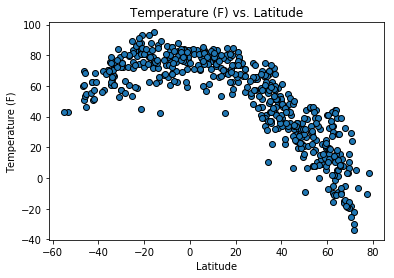

In [21]:
x= weather_df["Latitude"]
y= weather_df["Temperature (F)"]
plt.scatter (x,y, edgecolor = 'black')
plt.title('Temperature (F) vs. Latitude')
plt.ylabel("Temperature (F)")
plt.xlabel('Latitude')

plt.savefig("temp_lat.png")
plt.show()

# Scatter Plot- Humidity(%) vs. Latitude

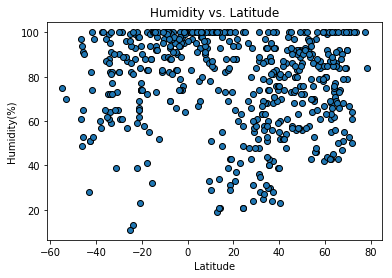

In [22]:
x= weather_df["Latitude"]
y= weather_df["Humidity (%)"]
plt.scatter (x,y, edgecolor = 'black')
plt.title('Humidity vs. Latitude')
plt.ylabel("Humidity(%)")
plt.xlabel('Latitude')
plt.savefig("hum_lat.png")
plt.show()


# Scatter Plot- Cloudiness vs. Latitude

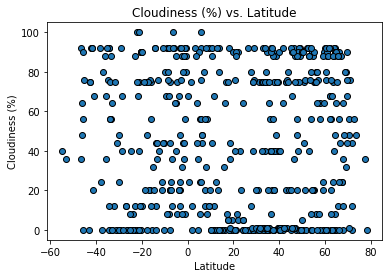

In [23]:
x= weather_df["Latitude"]
y= weather_df["Cloudiness (%)"]
plt.scatter (x,y,edgecolor = 'black')
plt.title('Cloudiness (%) vs. Latitude')
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.savefig("lat_cloud.png")
plt.show()


# Wind Speed (mph) vs. Latitude

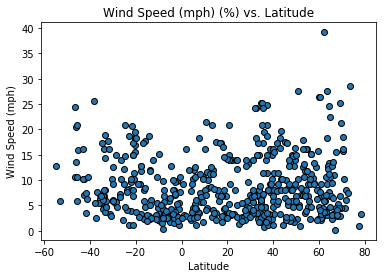

In [24]:
x= weather_df["Latitude"]
y= weather_df["Wind Speed (mph)"]
plt.scatter (x,y,edgecolor = 'black')
plt.title('Wind Speed (mph) (%) vs. Latitude')
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.savefig("lat_wind.png")
plt.show()
